In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [3]:
profile_df = pd.read_csv("customer_profiles.csv")
ad_events_df = pd.read_csv("ad_events.csv")
ad_details_df = pd.read_csv("ad_details.csv")

<AxesSubplot:xlabel='age', ylabel='income'>

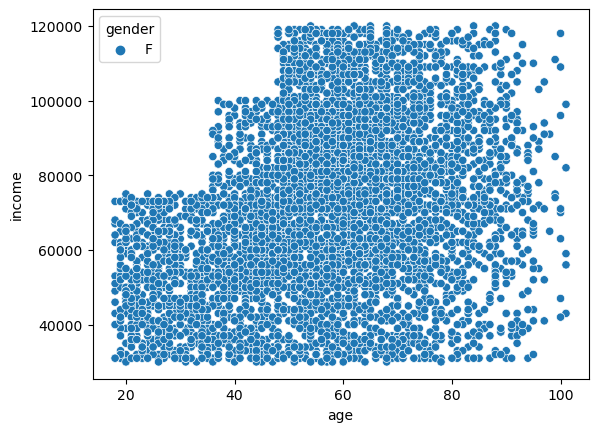

In [8]:
sns.scatterplot(data=profile_df[profile_df["gender"] == "F"], x="age", y="income", hue="gender")

<AxesSubplot:xlabel='age', ylabel='income'>

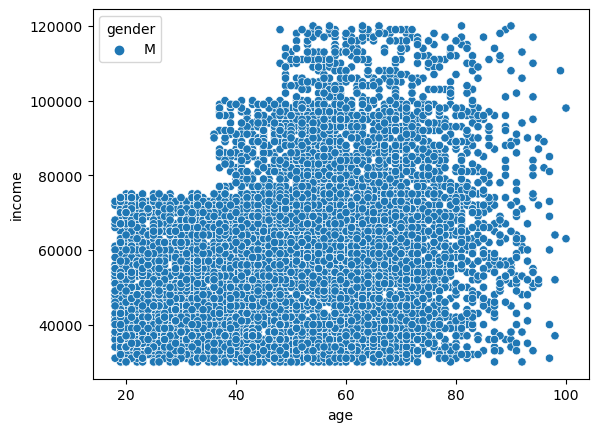

In [9]:
sns.scatterplot(data=profile_df[profile_df["gender"] == "M"], x="age", y="income", hue="gender")

In [6]:
targetEvent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11848 entries, 0 to 306196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customer    11848 non-null  object
 1   event       11848 non-null  object
 2   event_info  11848 non-null  object
 3   time        11848 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 462.8+ KB


In [53]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = ['age', 'income']

# Select the feature values
X = profile_df[features]

# Scale the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
eps = 0.1  # Adjust as needed
min_samples = 20  # Adjust as needed
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(X_scaled)

# Add cluster labels to DataFrame
profile_df['cluster'] = dbscan.labels_

# Check the number of clusters and noise points
num_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
num_noise_points = list(dbscan.labels_).count(-1)

print(f"Number of clusters: {num_clusters}")
print(f"Number of noise points: {num_noise_points}")


Number of clusters: 14
Number of noise points: 1323


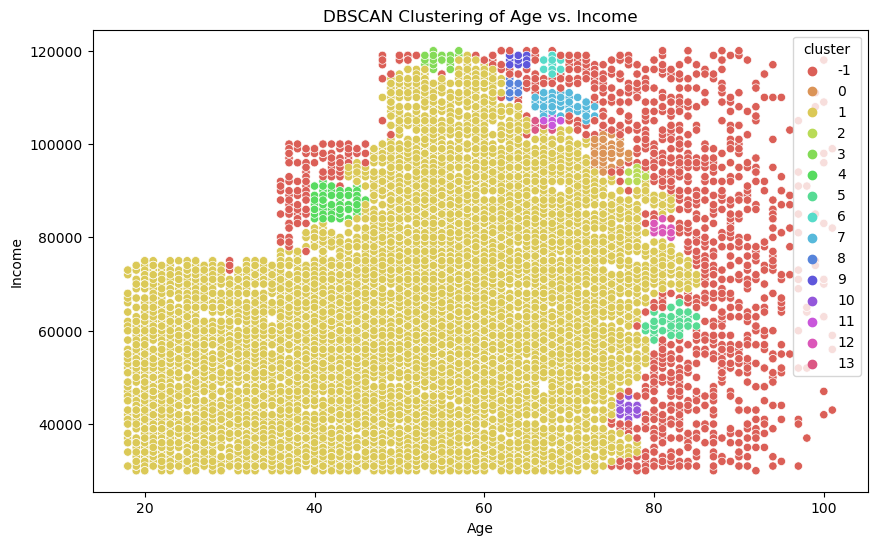

In [54]:
# Define a color palette for the clusters
num_clusters = len(set(profile_df['cluster'])) - (1 if -1 in profile_df['cluster'] else 0)
palette = sns.color_palette("hls", num_clusters)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='income', data=profile_df, hue='cluster', palette=palette, legend='full')
plt.title('DBSCAN Clustering of Age vs. Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()